In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv(r"stocks.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj_Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [3]:
data.head()

,Ticker,Date,Open,High,Low,Close,Adj_Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [4]:
data.tail(5)

,Ticker,Date,Open,High,Low,Close,Adj_Close,Volume
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
247,GOOG,2023-05-05,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


In [5]:
data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [6]:
# Check for duplicate rows
data.duplicated().sum()

0

In [7]:
data.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [8]:
import pandas as pd

# Filter the DataFrame for AAPL stock
aapl_data = data[data['Ticker'] == 'AAPL']
aapl_summary = aapl_data.describe()
aapl_summary


,Open,High,Low,Close,Adj_Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,157.779839,159.473710,156.670645,158.240645,158.229397,6.028296e+07
std,7.224608,7.167176,7.345529,7.360485,7.369573,1.430605e+07
min,144.380005,146.710007,143.899994,145.309998,145.309998,4.151620e+07
25%,151.489998,153.545002,150.474998,152.077499,151.903801,4.960702e+07
50%,158.400002,159.869995,157.109993,158.055000,158.055000,5.609455e+07
75%,164.702503,165.750004,163.797504,165.162506,165.162506,6.837618e+07
max,170.979996,174.300003,170.759995,173.570007,173.570007,1.133164e+08


In [9]:
import pandas as pd

# Filter the DataFrame for AAPL stock
aapl_data = data[data['Ticker'] == 'AAPL']

aaplinfo = aapl_data.info()
aaplinfo


<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     62 non-null     object 
 1   Date       62 non-null     object 
 2   Open       62 non-null     float64
 3   High       62 non-null     float64
 4   Low        62 non-null     float64
 5   Close      62 non-null     float64
 6   Adj_Close  62 non-null     float64
 7   Volume     62 non-null     int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 4.4+ KB


In [10]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Calculate average daily return
average_daily_return = data['Daily Return'].mean()

print(f'Average Daily Return: {average_daily_return:.5f}')


Average Daily Return: 0.00089


In [11]:
import plotly.express as px
fig = px.area(data, x='Date', y='Close', color='Ticker',
              facet_col='Ticker',
              labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
              title='Stock Prices for Apple, Microsoft, Netflix, and Google')
fig.show()

In [12]:
import plotly.graph_objects as go

# Plotting an interactive candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(title='Candlestick Chart of Stock Prices',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=True)

fig.show()


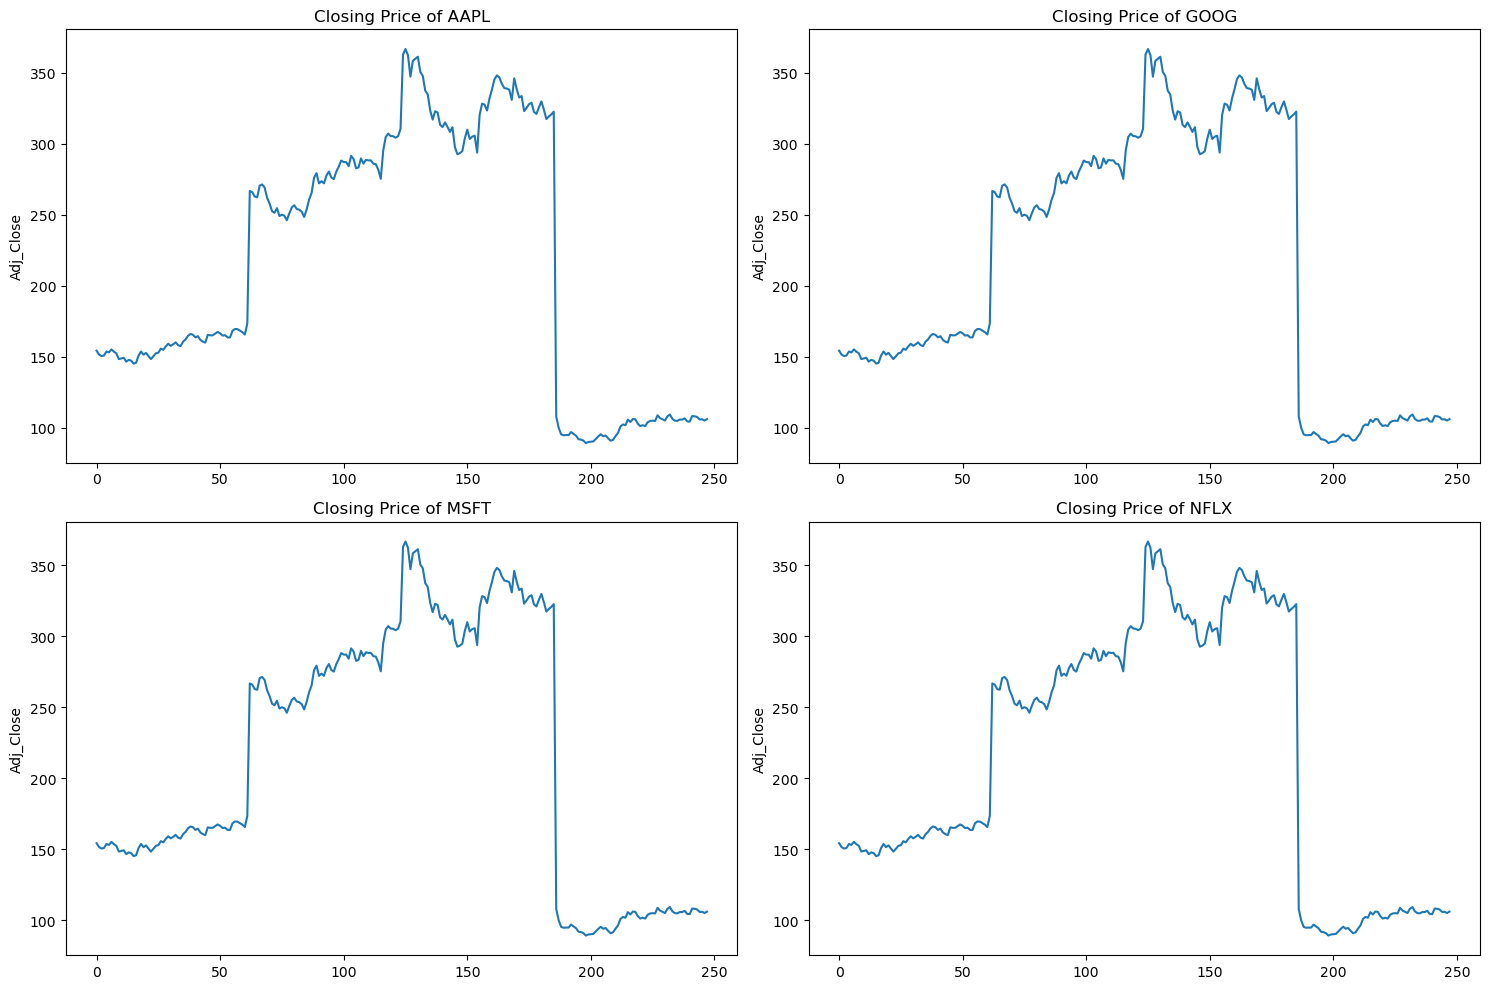

In [13]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
company_list=['AAPL','GOOG','MSFT','NFLX']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    data['Adj_Close'].plot()
    plt.ylabel('Adj_Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")
    
plt.tight_layout()

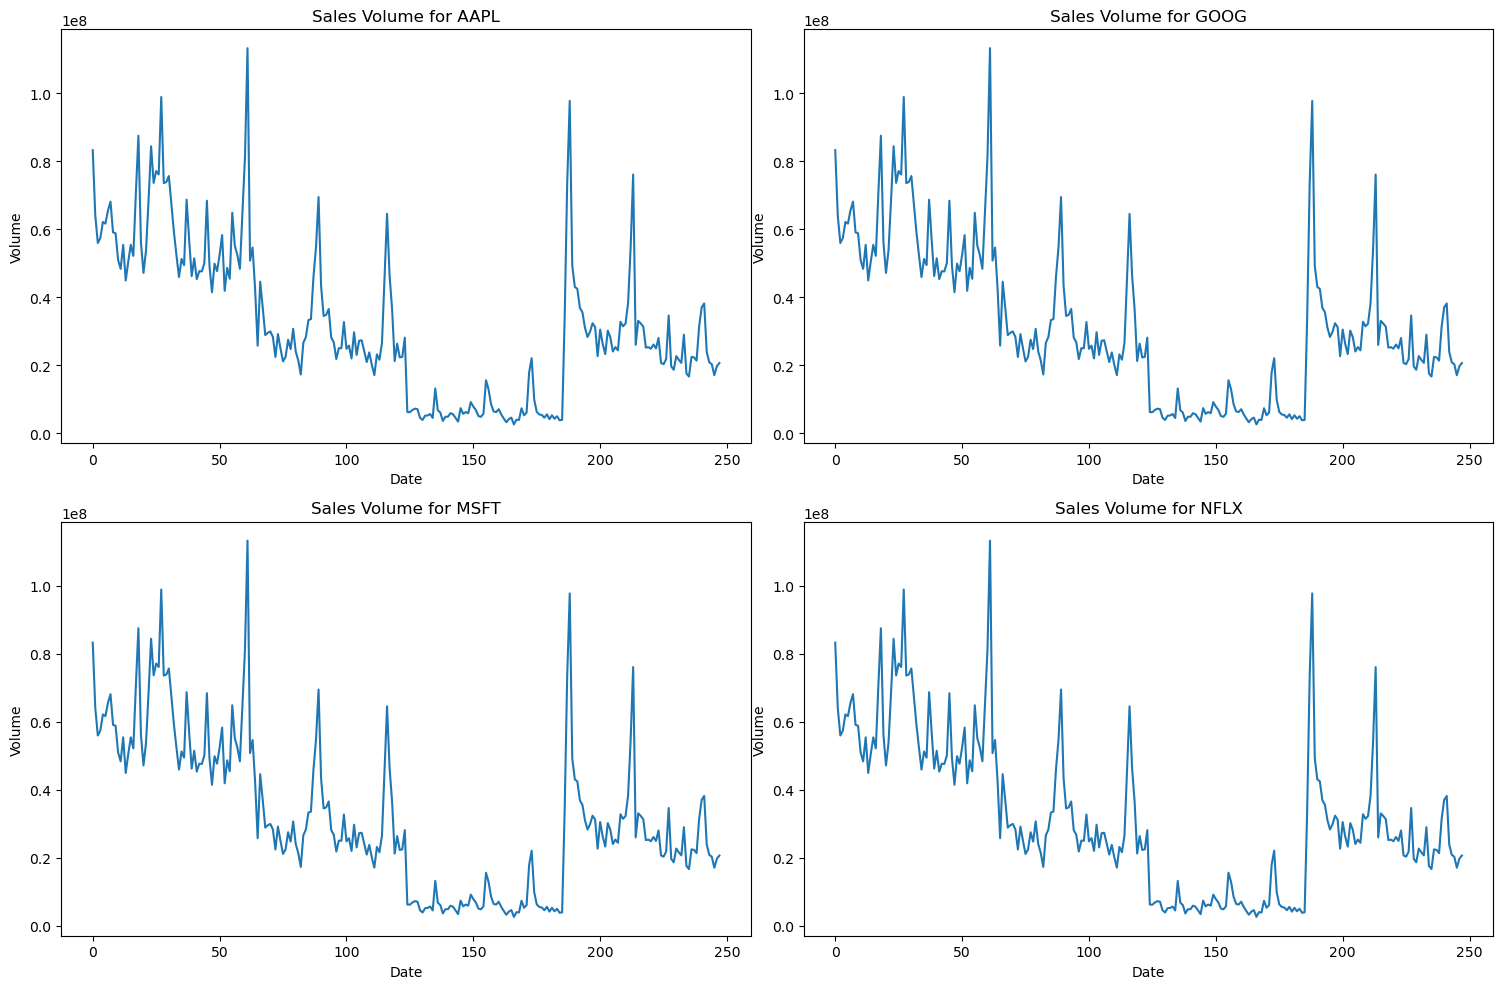

In [14]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    data['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales Volume for {company}")
    
plt.tight_layout()

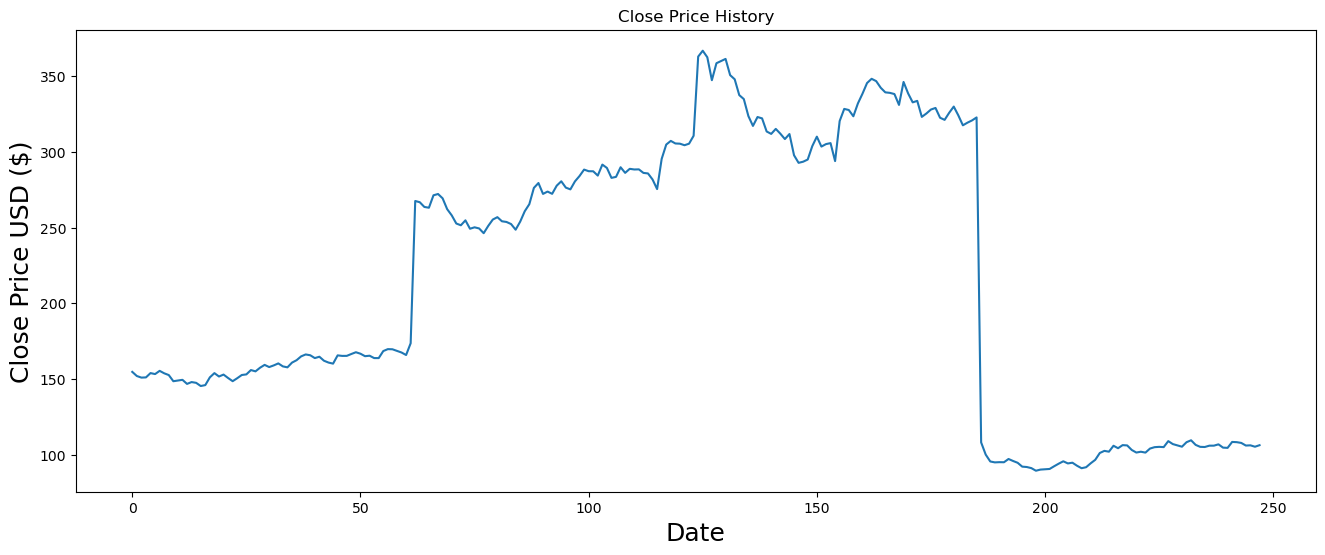

In [15]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()